In [1]:
# Importing libraries needed for the project
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from math import ceil #The math.ceil() method rounds to the nearest integer
from urllib.request import urlopen
import json
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning

In [2]:
# Load the Excel file into a DataFrame and save as a CSV file, display the first few rows
data = pd.read_excel("./All_time_together.xlsx")
data.to_csv("./All_time_together.csv", index=False)
data.head()


,User Name,Time limit for each question,Score(%),Score 1,Attempt Date,Taken Time,What is your gender?,How old are you?,"An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)",Answer,...,Time 3,How confident are you in your answers 3,What are characteristics of polynomial functions and other nonlinear graphs?,Answer.3,Time 4,How confident are you in your answers 4,The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT,Answer.4,Time 5,How confident are you in your answers 5
0,Guest1,2 min,14.285714,1,11-6-2024 12:43:26 PM,0:3:27,Female,28,Incorrect,NaN,...,00:02:00,Not at all confident,Correct,A polynomial function can be represented in fa...,00:01:50,Not at all confident,Incorrect,Hungary,00:02:00,Not at all confident
1,Guest2,2 min,14.285714,1,11-6-2024 09:56:16 AM,0:3:3,Female,25,Correct,196 J,...,00:01:16,Not at all confident,Incorrect,Polynomial functions are linear and have only ...,00:00:23,Not at all confident,Incorrect,NaN,00:00:02,Not at all confident
2,Guest3,2 min,14.285714,1,11-6-2024 09:40:01 AM,0:4:39,Male,26,Incorrect,NaN,...,00:01:59,Not at all confident,Incorrect,Rational functions have their input in the num...,00:01:48,Slightly confident,Incorrect,East Germany,00:01:54,Not at all confident
3,Guest4,2 min,14.285714,1,11-6-2024 09:25:58 AM,0:3:7,Male,23,Incorrect,98 J,...,00:00:33,Slightly confident,Correct,A polynomial function can be represented in fa...,00:01:24,Slightly confident,Incorrect,Czechoslovakia,00:01:54,Not at all confident
4,Guest5,2 min,28.571428,1,11-6-2024 09:11:37 AM,0:3:3,Male,22,Correct,196 J,...,00:00:20,Extremely confident,Correct,A polynomial function can be represented in fa...,00:00:55,Extremely confident,Correct,Romania,00:01:55,Quite confident


In [3]:
# Calculate the total score from the two score columns
data['Total_Score'] = data['Score 1'] + data['Score 2']

# Calculate % of total score
data['Total_Score_%'] = (data['Total_Score'] / 5) * 100

# Display all the scores
data[['Score 1', 'Score 2', 'Total_Score', 'Total_Score_%']]

,Score 1,Score 2,Total_Score,Total_Score_%
0,1,1,2,40.0
1,1,1,2,40.0
2,1,1,2,40.0
3,1,2,3,60.0
4,1,3,4,80.0
5,1,3,4,80.0
6,0,2,2,40.0
7,1,3,4,80.0
8,1,2,3,60.0
9,2,3,5,100.0


In [5]:
# Convert the time columns to seconds and sum them
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Sum the times and make a total time data column
data['Total_Time'] = data[['Time 1', 'Time 2', 'Time 3', 'Time 4', 'Time 5']].applymap(time_to_seconds).sum(axis=1)

# Convert time to hour, minutes and seconds format
def seconds_to_hms(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f"{h:02}:{m:02}:{s:02}"

data['Total_Time_HHMMSS'] = data['Total_Time'].apply(seconds_to_hms)
data['Total_Time_HHMMSS']

0     00:08:56
1     00:04:11
2     00:09:29
3     00:06:36
4     00:05:56
5     00:06:38
6     00:06:50
7     00:09:03
8     00:07:40
9     00:06:08
10    00:08:02
11    00:08:47
12    00:02:46
13    00:07:35
14    00:09:02
15    00:11:45
16    00:06:23
17    00:08:41
18    00:12:45
19    00:15:54
20    00:12:34
21    00:09:54
22    00:09:25
23    00:09:15
24    00:05:17
25    00:09:01
26    00:07:09
27    00:08:36
28    00:10:27
29    00:09:46
Name: Total_Time_HHMMSS, dtype: object

In [6]:
# Update the spreadsheet
data.to_excel('updated_file.xlsx', index=False)
data.head()

,User Name,Time limit for each question,Score(%),Score 1,Attempt Date,Taken Time,What is your gender?,How old are you?,"An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)",Answer,...,Time 4,How confident are you in your answers 4,The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT,Answer.4,Time 5,How confident are you in your answers 5,Total_Score,Total_Score_%,Total_Time,Total_Time_HHMMSS
0,Guest1,2 min,14.285714,1,11-6-2024 12:43:26 PM,0:3:27,Female,28,Incorrect,NaN,...,00:01:50,Not at all confident,Incorrect,Hungary,00:02:00,Not at all confident,2,40.0,536,00:08:56
1,Guest2,2 min,14.285714,1,11-6-2024 09:56:16 AM,0:3:3,Female,25,Correct,196 J,...,00:00:23,Not at all confident,Incorrect,NaN,00:00:02,Not at all confident,2,40.0,251,00:04:11
2,Guest3,2 min,14.285714,1,11-6-2024 09:40:01 AM,0:4:39,Male,26,Incorrect,NaN,...,00:01:48,Slightly confident,Incorrect,East Germany,00:01:54,Not at all confident,2,40.0,569,00:09:29
3,Guest4,2 min,14.285714,1,11-6-2024 09:25:58 AM,0:3:7,Male,23,Incorrect,98 J,...,00:01:24,Slightly confident,Incorrect,Czechoslovakia,00:01:54,Not at all confident,3,60.0,396,00:06:36
4,Guest5,2 min,28.571428,1,11-6-2024 09:11:37 AM,0:3:3,Male,22,Correct,196 J,...,00:00:55,Extremely confident,Correct,Romania,00:01:55,Quite confident,4,80.0,356,00:05:56


Descriptive data

In [7]:
# Overall mean total score percentage and total time in seconds
overall_mean_score = data['Total_Score_%'].mean()
overall_mean_time = data['Total_Time'].mean() 
overall_median_time = data['Total_Time'].median()

print(f"Overall Mean Total Score (%): {overall_mean_score}")
print(f"Overall Mean Total Time (seconds): {overall_mean_time}")
print(f"Overall Median Total Time (seconds): {overall_median_time}")

# Group by time limit of score and time (mean)
grouped_means = data.groupby('Time limit for each question').agg({
    'Total_Score_%': 'mean',
    'Total_Time': 'mean'
})

# Convert mean total time to HH:MM:SS for readability
grouped_means['Mean Total Time (HH:MM:SS)'] = grouped_means['Total_Time'].apply(seconds_to_hms)

print(grouped_means)

# Group by time limit of score and time (median)
grouped_medians = data.groupby('Time limit for each question').agg({
    'Total_Score_%': 'median',
    'Total_Time': 'median'
})

# Convert median total time to HH:MM:SS for readability
grouped_medians['Median Total Time (HH:MM:SS)'] = grouped_medians['Total_Time'].apply(seconds_to_hms)

print(grouped_medians)



Overall Mean Total Score (%): 76.66666666666667
Overall Mean Total Time (seconds): 509.03333333333336
Overall Median Total Time (seconds): 524.0
                              Total_Score_%  Total_Time  \
Time limit for each question                              
2 min                                  62.0       428.7   
4 min                                  88.0       550.0   
No time limit                          80.0       548.4   

                             Mean Total Time (HH:MM:SS)  
Time limit for each question                             
2 min                         0.0:7.0:8.699999999999989  
4 min                                      0.0:9.0:10.0  
No time limit                 0.0:9.0:8.399999999999977  
                              Total_Score_%  Total_Time  \
Time limit for each question                              
2 min                                  60.0       404.0   
4 min                                  80.0       524.0   
No time limit                    

In [8]:
# Collect all confident related questions and time limit for relevant data
confidence_columns = [col for col in data.columns if "How confident are you in your answers" in col]
relevant_data = data[["Time limit for each question"] + confidence_columns]

# Melt the data into long format
melted_confidence = relevant_data.melt(
    id_vars=["Time limit for each question"],
    var_name="Confidence Measure",
    value_name="Confidence Level"
)

In [9]:
print(data.columns)

Index(['User Name', 'Time limit for each question', 'Score(%)', 'Score 1',
       'Attempt Date', 'Taken Time', 'What is your gender?',
       'How old are you?',
       'An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)',
       'Answer', 'Time 1', 'How confident are you in your answers 1',
       'Which hormone is responsible for triggering ovulation during the menstrual cycle?',
       'Answer.1', 'Time 2', 'How confident are you in your answers 2',
       'Taken Time (2)', 'Score(%) (2)', 'Score 2',
       'Which of the following is equivalent to', 'Answer.2', 'Time 3',
       'How confident are you in your answers 3',
       'What are characteristics of polynomial functions and other nonlinear graphs?',
       'Answer.3', 'Time 4', 'How confident are you in your answers 4',
       'The collapse of Communist rule throughout 

In [11]:
# List of the question columns to combine
question_columns = [
    "An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)",
    "Which hormone is responsible for triggering ovulation during the menstrual cycle?",
    "Which of the following is equivalent to",
    "What are characteristics of polynomial functions and other nonlinear graphs?",
    "The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT"
]

# Melt the data to combine all confidence columns into a single column
melted_confidence_data = data.melt(
    id_vars=["Time limit for each question", "User Name"],
    value_vars=confidence_columns, 
    var_name="Confidence Measure",
    value_name="Confidence Level",
)

# Melt the data to combine all question columns into a single column
melted_question_data = data.melt(
    id_vars=["Time limit for each question", "User Name"],
    value_vars=question_columns,
    var_name="Question",
    value_name="Answer_Value"  # Use a unique name for the melted values
)

# Translate correct/incorrect answers into binary format
melted_question_data["Correct"] = melted_question_data["Answer_Value"].str.strip().str.lower() == "correct"

# Ensure unique alignment by adding an index column to both dataframes
melted_confidence_data["Index"] = melted_confidence_data.index
melted_question_data["Index"] = melted_question_data.index

# Concatenate the two tables by aligning their indices
combined_data = pd.concat(
    [melted_question_data, melted_confidence_data[["Confidence Measure", "Confidence Level"]]],
    axis=1
)

# Drop the temporary index column
combined_data = combined_data.drop(columns=["Index"])

combined_data

,Time limit for each question,User Name,Question,Answer_Value,Correct,Confidence Measure,Confidence Level
0,2 min,Guest1,An object with a mass of 2 kg is lifted to a h...,Incorrect,False,How confident are you in your answers 1,Not at all confident
1,2 min,Guest2,An object with a mass of 2 kg is lifted to a h...,Correct,True,How confident are you in your answers 1,Quite confident
2,2 min,Guest3,An object with a mass of 2 kg is lifted to a h...,Incorrect,False,How confident are you in your answers 1,Not at all confident
3,2 min,Guest4,An object with a mass of 2 kg is lifted to a h...,Incorrect,False,How confident are you in your answers 1,Somewhat confident
4,2 min,Guest5,An object with a mass of 2 kg is lifted to a h...,Correct,True,How confident are you in your answers 1,Extremely confident
...,...,...,...,...,...,...,...
145,No time limit,Guest26,The collapse of Communist rule throughout East...,Correct,True,How confident are you in your answers 5,Extremely confident
146,No time limit,Guest27,The collapse of Communist rule throughout East...,Correct,True,How confident are you in your answers 5,Somewhat confident
147,No time limit,Guest28,The collapse of Communist rule throughout East...,Correct,True,How confident are you in your answers 5,Somewhat confident
148,No time limit,Guest29,The collapse of Communist rule throughout East...,Correct,True,How confident are you in your answers 5,Quite confident


In [12]:
# Count the number of responses per time limit and confidence level
response_counts = combined_data.groupby(
    ["Time limit for each question", "Confidence Level"]
).size().reset_index(name="Response Count")

# Count the number of correct responses per time limit and confidence level
correct_counts_corrected = combined_data[combined_data["Correct"]].groupby(
    ["Time limit for each question", "Confidence Level"]
).size().reset_index(name="Correct Count")

# Merge all the counts into a single table

final_response_data = pd.merge(
    response_counts,
    correct_counts_corrected,
    on=["Time limit for each question", "Confidence Level"],
    how="left"
)

# Replace NaN with 0 where no correct responses exist
final_response_data["Correct Count"] = final_response_data["Correct Count"].fillna(0)

final_response_data


,Time limit for each question,Confidence Level,Response Count,Correct Count
0,2 min,Extremely confident,13,12
1,2 min,Not at all confident,15,4
2,2 min,Quite confident,11,9
3,2 min,Slightly confident,5,3
4,2 min,Somewhat confident,6,4
5,4 min,Extremely confident,11,11
6,4 min,Not at all confident,5,3
7,4 min,Quite confident,18,17
8,4 min,Slightly confident,4,3
9,4 min,Somewhat confident,12,10


In [13]:
melted_confidence_data

,Time limit for each question,User Name,Confidence Measure,Confidence Level,Index
0,2 min,Guest1,How confident are you in your answers 1,Not at all confident,0
1,2 min,Guest2,How confident are you in your answers 1,Quite confident,1
2,2 min,Guest3,How confident are you in your answers 1,Not at all confident,2
3,2 min,Guest4,How confident are you in your answers 1,Somewhat confident,3
4,2 min,Guest5,How confident are you in your answers 1,Extremely confident,4
...,...,...,...,...,...
145,No time limit,Guest26,How confident are you in your answers 5,Extremely confident,145
146,No time limit,Guest27,How confident are you in your answers 5,Somewhat confident,146
147,No time limit,Guest28,How confident are you in your answers 5,Somewhat confident,147
148,No time limit,Guest29,How confident are you in your answers 5,Quite confident,148


In [14]:
# Update the order of confidence levels and rename them with numbers
confidence_order = [
    "(1) Not at all confident",
    "(2) Slightly confident",
    "(3) Somewhat confident",
    "(4) Quite confident",
    "(5) Extremely confident",
]

# Prepare the data for plotting
final_response_data["Correct Percentage"] = (final_response_data["Correct Count"] / final_response_data["Response Count"]) * 100


# Map the confidence levels to their ordered names
final_response_data["Confidence Level"] = final_response_data["Confidence Level"].map({
    "Not at all confident": "(1) Not at all confident",
    "Slightly confident": "(2) Slightly confident",
    "Somewhat confident": "(3) Somewhat confident",
    "Quite confident": "(4) Quite confident",
    "Extremely confident": "(5) Extremely confident",
})

# Ensure the data is sorted by the confidence order
final_response_data["Confidence Level"] = pd.Categorical(
    final_response_data["Confidence Level"], categories=confidence_order, ordered=True
)
final_response_data = final_response_data.sort_values("Confidence Level")

# Pivot data for plotting
pivot_data = final_response_data.pivot(index="Confidence Level", columns="Time limit for each question", values="Response Count")
pivot_percentage = final_response_data.pivot(index="Confidence Level", columns="Time limit for each question", values="Correct Percentage")

# Define plot parameters
time_limits = ["2 min", "4 min", "No time limit"]
x = np.arange(len(pivot_data.index))  # the label locations
width = 0.25  # the width of the bars

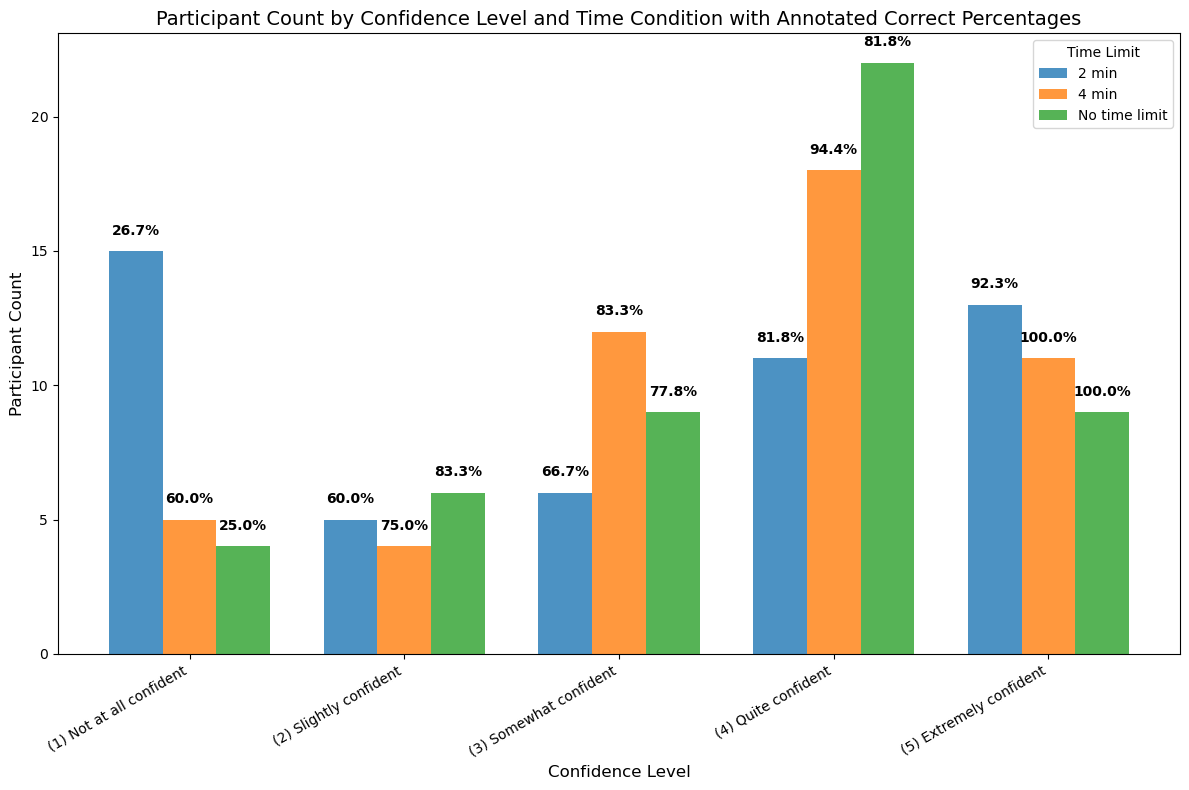

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each time limit condition
bars_2min = ax.bar(x - width, pivot_data["2 min"], width, label="2 min", alpha=0.8)
bars_4min = ax.bar(x, pivot_data["4 min"], width, label="4 min", alpha=0.8)
bars_no_time = ax.bar(x + width, pivot_data["No time limit"], width, label="No time limit", alpha=0.8)

# Annotate bars with percentages
for bars, time_limit in zip([bars_2min, bars_4min, bars_no_time], time_limits):
    for bar, percentage in zip(bars, pivot_percentage[time_limit]):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f"{percentage:.1f}%",
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            fontweight="bold",
        )

# Customize plot
ax.set_xlabel("Confidence Level", fontsize=12)
ax.set_ylabel("Participant Count", fontsize=12)
ax.set_title("Participant Count by Confidence Level and Time Condition with Annotated Correct Percentages", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, rotation=30, ha="right", fontsize=10)
ax.legend(title="Time Limit")

plt.tight_layout()
plt.show()


In [34]:
# Separate the data by time limit
score_2min = data[data['Time limit for each question'] == '2 min']['Total_Score_%']
score_4min = data[data['Time limit for each question'] == '4 min']['Total_Score_%']
score_no_time = data[data['Time limit for each question'] == 'No time limit']['Total_Score_%']

print("If value is greater than 0.05, then the data is likely normal distribution, otherwise, it is not normally distributed") 


# Shapiro-Wilk Test for 2min group
stat, p_value = shapiro(score_2min)
if p_value > 0.05:
    print("Shapiro-Wilk Test 2min: p-value =", p_value, "- Likely normal distribution")
else:
    print("Shapiro-Wilk Test 2min: p-value =", p_value, "- Not a normal distribution")

# Shapiro-Wilk Test for 4min group
stat, p_value = shapiro(score_4min)
if p_value > 0.05:
    print("Shapiro-Wilk Test 4min: p-value =", p_value, " > 0.05 - Likely normal distribution")
else:
    print("Shapiro-Wilk Test 4min: p-value =", p_value, "- Not a normal distribution")

# Shapiro-Wilk Test for no time limit group
stat, p_value = shapiro(score_no_time)
if p_value > 0.05:
    print("Shapiro-Wilk Test no time limit: p-value =", p_value, "- Likely normal distribution")
else:
    print("Shapiro-Wilk Test no time limit: p-value =", p_value, "- Not a normal distribution")

If value is greater than 0.05, then the data is likely normal distribution, otherwise, it is not normally distributed
Shapiro-Wilk Test 2min: p-value = 0.06718964710313462 - Likely normal distribution
Shapiro-Wilk Test 4min: p-value = 0.00016867907610300183 - Not a normal distribution
Shapiro-Wilk Test no time limit: p-value = 0.045030409840928896 - Not a normal distribution


In [35]:
# Perform Kruskal-Wallis test between all three groups
kruskal_test = stats.kruskal(score_2min, score_4min, score_no_time)

# Print the results of the Kruskal-Wallis test
print("Kruskal-Wallis Test Result:", kruskal_test)

# If the p-value is below the significance level (0.05), it suggests that there is a significant difference
alpha = 0.05
if kruskal_test.pvalue < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

Kruskal-Wallis Test Result: KruskalResult(statistic=7.693997965412008, pvalue=0.021343693215136877)
There is a significant difference between the groups.


In [36]:
# Separate the data by time limit
score_2min = data[data['Time limit for each question'] == '2 min']['Total_Score_%']
score_4min = data[data['Time limit for each question'] == '4 min']['Total_Score_%']
score_no_time = data[data['Time limit for each question'] == 'No time limit']['Total_Score_%']

# Perform pairwise Mann-Whitney U tests between all groups
u_test_2min_4min = mannwhitneyu(score_2min, score_4min, alternative='two-sided')
u_test_2min_no_time = mannwhitneyu(score_2min, score_no_time, alternative='two-sided')
u_test_4min_no_time = mannwhitneyu(score_4min, score_no_time, alternative='two-sided')

# Adjusted significance level (Bonferroni correction)
alpha_adjusted = 0.05 / 3  # 3 comparisons
print(alpha_adjusted)

# Store p-values for each comparison
p_values = {
    "2 min vs 4 min": u_test_2min_4min.pvalue,
    "2 min vs No time limit": u_test_2min_no_time.pvalue,
    "4 min vs No time limit": u_test_4min_no_time.pvalue
}

# Check significance after Bonferroni correction
for comparison, p_value in p_values.items():
    if p_value < alpha_adjusted:
        print(f"{comparison}: Significant (p-value: {p_value:.4f})")
    else:
        print(f"{comparison}: Not Significant (p-value: {p_value:.4f})")

0.016666666666666666
2 min vs 4 min: Significant (p-value: 0.0091)
2 min vs No time limit: Not Significant (p-value: 0.0748)
4 min vs No time limit: Not Significant (p-value: 0.3726)


In [37]:
# Create a DataFrame for the results
results = pd.DataFrame({
    "Comparison": ["2 min vs 4 min", "2 min vs No time limit", "4 min vs No time limit"],
    "U Statistic": [u_test_2min_4min.statistic, u_test_2min_no_time.statistic, u_test_4min_no_time.statistic],
    "p-value": [u_test_2min_4min.pvalue, u_test_2min_no_time.pvalue, u_test_4min_no_time.pvalue],
    "Significant": [
        "Yes" if u_test_2min_4min.pvalue < alpha_adjusted else "No",
        "Yes" if u_test_2min_no_time.pvalue < alpha_adjusted else "No",
        "Yes" if u_test_4min_no_time.pvalue < alpha_adjusted else "No"
    ]
})

# Print the table
print(results)

               Comparison  U Statistic   p-value Significant
0          2 min vs 4 min         17.0  0.009071         Yes
1  2 min vs No time limit         27.0  0.074796          No
2  4 min vs No time limit         61.0  0.372601          No


2 min vs 4 min: p-value = 0.0033 (Less than 0.0167, which is the adjusted threshold after Bonferroni correction). Conclusion: Significant difference between the 2 min and 4 min time limits. The 4 min group performed significantly better than the 2 min group.

p-value = 0.0652 (Greater than 0.0167). Conclusion: Not significant. There is no statistically significant difference between the 2 min and No time limit groups, suggesting that the time limit did not significantly affect the scores compared to the no time limit condition.

p-value = 0.2546 (Greater than 0.0167). Conclusion: Not significant. No significant difference between the 4 min and No time limit groups, suggesting that increasing the time limit from 4 minutes to no time limit did not lead to a statistically significant difference in scores.

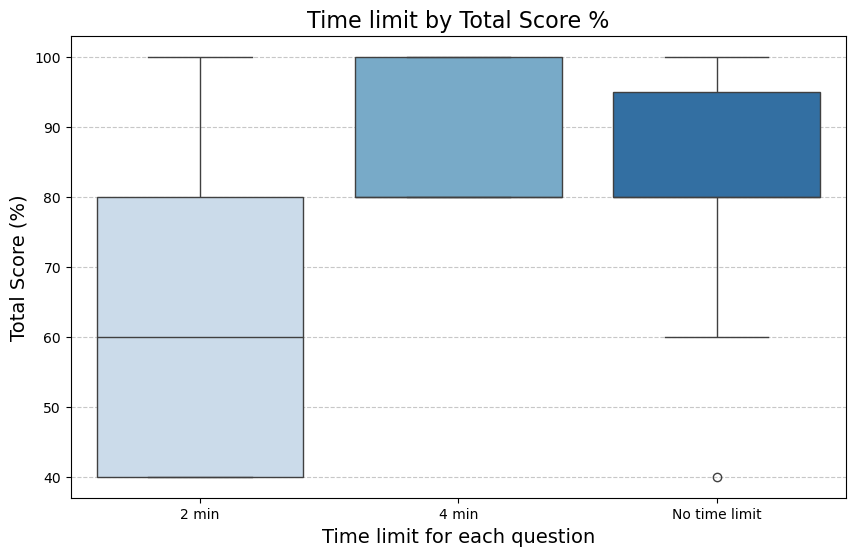

In [28]:
data_cleaned = data.dropna(subset=['Time limit for each question', 'Total_Score_%'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Time limit for each question', y='Total_Score_%', data=data_cleaned, palette='Blues')
plt.title('Time limit by Total Score %', fontsize=16)
plt.ylabel('Total Score (%)', fontsize=14)
plt.xlabel('Time limit for each question', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

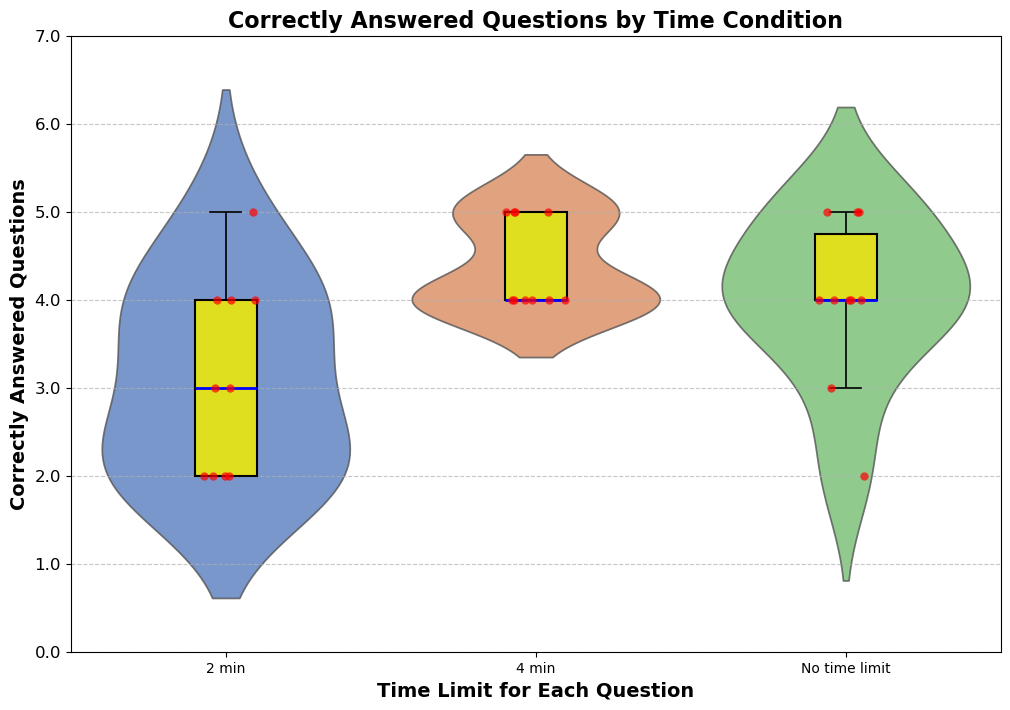

In [29]:
# Creating the raincloud-like plot
plt.figure(figsize=(12, 8))

# Define a cohesive color palette
main_palette = sns.color_palette("muted", n_colors=3)

# Violin plot for distribution
sns.violinplot(
    x='Time limit for each question',
    y='Total_Score_%',
    data=data_cleaned,
    palette=main_palette,  # Use a consistent palette
    inner=None,  # Remove the internal box plot from the violin
    alpha=0.8
)

# Box plot for summary statistics
sns.boxplot(
    x='Time limit for each question',
    y='Total_Score_%',
    data=data_cleaned,
    width=0.2,
    color='yellow',  # Select a color from the palette
    boxprops=dict(edgecolor='black', linewidth=1.5),  # Add an outline for clarity
    whiskerprops=dict(color='black', linewidth=1.2),
    capprops=dict(color='black', linewidth=1.2),
    medianprops=dict(color='blue', linewidth=2),
    showfliers=False  # Hide outliers for clarity
)

# Scatter plot for raw data points
sns.stripplot(
    x='Time limit for each question',
    y='Total_Score_%',
    data=data_cleaned,
    color='red',  # Harmonize scatter points
    size=6,
    jitter=True,  # Jitter to avoid overlapping
    alpha=0.7
)

# Customize y-axis ticks with correct positions
current_ticks = plt.yticks()[0]  # Get default tick positions from the plot
custom_labels = [f'{tick/20}' for tick in current_ticks]  # Map labels to current ticks
plt.yticks(ticks=current_ticks, labels=custom_labels, fontsize=12)

# Customizing the plot
plt.title('Correctly Answered Questions by Time Condition', fontsize=16, weight='bold')
plt.xlabel('Time Limit for Each Question', fontsize=14, weight='bold')
plt.ylabel('Correctly Answered Questions', fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


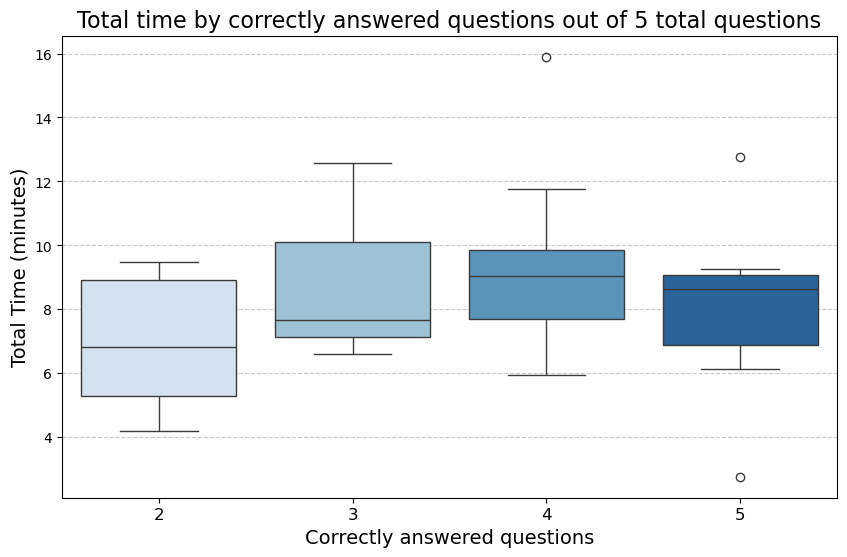

In [30]:
# Convert the time to minutes
def time_to_minutes(seconds):
    return seconds / 60

data['Total_Time_Minutes'] = time_to_minutes(data['Total_Time'])

data_cleaned = data.dropna(subset=['Total_Time_Minutes', 'Total_Score_%'])


plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Score_%', y='Total_Time_Minutes', data=data_cleaned, palette='Blues')
plt.title('Total time by correctly answered questions out of 5 total questions', fontsize=16)
plt.xlabel('Correctly answered questions', fontsize=14)
plt.ylabel('Total Time (minutes)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize x-axis labels
custom_labels = ['2', '3', '4', '5']  
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, fontsize=12)  # Adjust ticks and labels

plt.show()


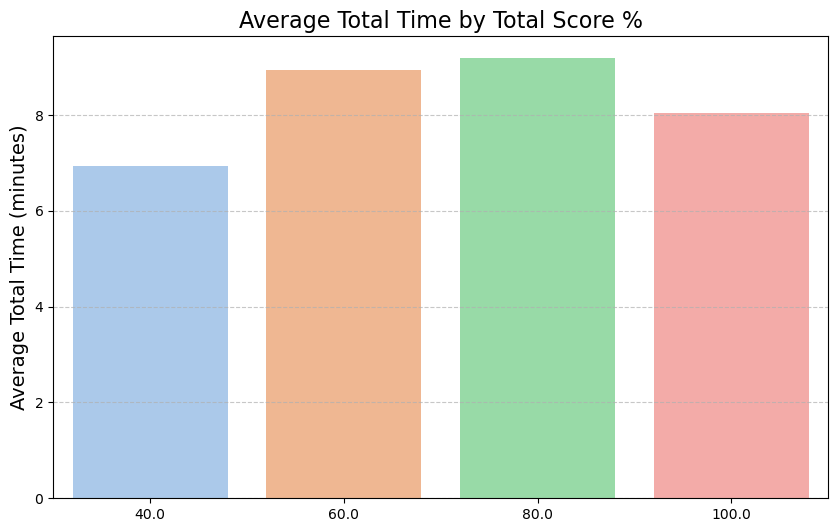

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Score_%', y='Total_Time_Minutes', data=data_cleaned, ci=None, palette='pastel')
plt.title('Average Total Time by Total Score %', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Average Total Time (minutes)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 
